# Лабораторная работа №3: Частотный анализ полиномиальных приближений

Выполнили студенты гр. 2384 Тимченко Дмитрий Алексеевич и Цыганков Роман Максимович. Вариант №.19

## Цель работы

Провести анализ частотных характеристик известных формул полиномиального сглаживания временных рядов.

## Основные теоретические положения

Входной сигнал:

$s(t) = \sum_{m=1}^{M} c_m e^{iw_mt}$

Выходной сигнал:

$y(t) = \sum_{m=1}^{M} c_m H(w_m) e^{iw_mt}$

Необходимое условие для МНК:

$F(y_k) = \sum_{-k}^{k} (s_k - y_k)^2 → min$

Формула для вычисления передаточной функции рекурсивного фильтра $y_n$ дискретного сигнала $x_n$:

$H(w) = \frac{y_n}{x_n}$

Связь передаточной функции для круговой частоты и циклической:

$H(w) = H(2 \pi f) = \tilde H(f)$

Перевод значений передаточной функции в логарифмическую шкалу:

$Дб = 20 \lg \left(\left|\frac{y_n}{s_n}\right|\right) = 20 \lg (|H(w)|)$

## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для полиномов различного порядка и построить графики $\tilde H(f)$. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных степеней полиномов.

## Выполнение работы

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import math as m

## 1. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по 3, 5, 7 и 9 точкам. Построить графики $\tilde H(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

# Сглаживание сигнала методом наименьших квадратов (МНК) с использованием линейной модели

Для сглаживания дискретного сигнала $s(t)$ используется нерекурсивный фильтр, аппроксимирующий данные на скользящем окне прямой линией:
$$y(t) = A + Bt$$

## Вывод коэффициентов фильтра

Коэффициенты $A$ и $B$ находятся методом наименьших квадратов (МНК) путем минимизации ошибки на интервале из $N = 2h + 1$ точек (от $-h$ до $h$):
$$F(A, B) = \sum_{k=-h}^{h} (s_k - A - Bk)^2 \to \min$$

Приравнивая частные производные к нулю, получаем систему нормальных уравнений, решение которой даёт формулы для коэффициентов:
$$\begin{cases}
A = \dfrac{1}{2h + 1} \sum_{k=-h}^{h} s_k \\
B = \dfrac{3}{h(h + 1)(2h + 1)} \sum_{k=-h}^{h} k s_k
\end{cases}$$

## Импульсная характеристика и скользящее среднее

Подставив коэффициенты в модель для центральной точки окна $t=0$, получаем выходной сигнал:
$$y_0 = A = \frac{1}{2h + 1} \sum_{k=-h}^{h} s_k$$

Это соответствует **простому скользящему среднему**. Сдвигая окно так, чтобы произвольная точка $s_n$ стала центром, получаем общую формулу фильтра:
$$y_n = \frac{1}{N} \sum_{k=-h}^{h} s_{n+k}$$
где $N = 2h + 1$ — ширина окна.

## Частотная характеристика фильтра

Для анализа частотных свойств рассмотрим реакцию на комплексную экспоненту $s_n = e^{i \omega n}$. Выходной сигнал будет равен:
$$y_n = \frac{1}{N} \sum_{k=-h}^{h} e^{i \omega (n + k)} = e^{i \omega n} \cdot \frac{1}{N} \sum_{k=-h}^{h} e^{i \omega k} = e^{i \omega n} H_N(\omega)$$
где $H_N(\omega)$ — **передаточная функция** фильтра.

Эту функцию можно выразить несколькими способами:

1. **Через косинусы:**
$$H_N(\omega) = \frac{1}{N} \left( 1 + 2 \sum_{k=1}^{h} \cos(\omega k) \right)$$

2. **В замкнутой форме (через функцию Дирихле):**
$$H_N(\omega) = \frac{1}{N} \cdot \frac{\sin\left( N \frac{\omega}{2} \right)}{\sin\left( \frac{\omega}{2} \right)}$$

В терминах обычной частоты $f$ ($\omega = 2\pi f$) передаточная функция принимает вид:
$$\tilde{H}(f) = \frac{1}{N} \cdot \frac{\sin\left( \pi f N \right)}{\sin\left( \pi f \right)}$$

### Для 3 точек
- **Временная область:**
$$y_n = \frac{1}{3}(s_{n-1} + s_n + s_{n+1})$$
- **Частотная область (через косинусы):**
$$H(\omega) = \frac{1}{3}(1 + 2\cos\omega)$$

### Для 5 точек
- **Временная область:**
$$y_n = \frac{1}{5}(s_{n-2} + s_{n-1} + s_n + s_{n+1} + s_{n+2})$$
- **Частотная область (через косинусы):**
$$H(\omega) = \frac{1}{5}(1 + 2\cos\omega + 2\cos(2\omega))$$

### Для 7 точек
- **Временная область:**
$$y_n = \frac{1}{7}(s_{n-3} + s_{n-2} + s_{n-1} + s_n + s_{n+1} + s_{n+2} + s_{n+3})$$
- **Частотная область (через косинусы):**
$$H(\omega) = \frac{1}{7}(1 + 2\cos\omega + 2\cos(2\omega) + 2\cos(3\omega))$$

### Для 9 точек
- **Временная область:**
$$y_n = \frac{1}{9}(s_{n-4} + s_{n-3} + s_{n-2} + s_{n-1} + s_n + s_{n+1} + s_{n+2} + s_{n+3} + s_{n+4})$$
- **Частотная область (через косинусы):**
$$H(\omega) = \frac{1}{9}(1 + 2\cos\omega + 2\cos(2\omega) + 2\cos(3\omega) + 2\cos(4\omega))$$

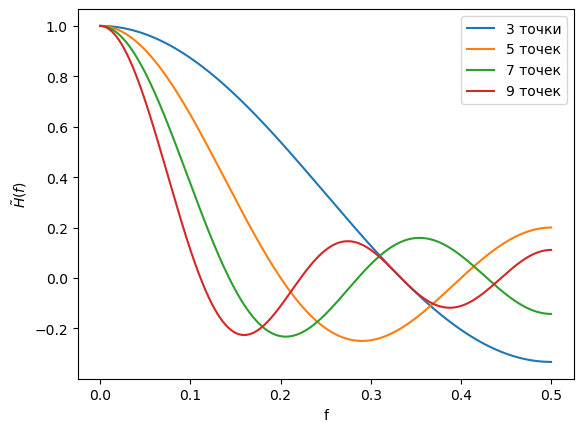

In [25]:
F = np.arange(0, 0.5, 0.0003)
W = [2 * m.pi * f for f in F]
H3_1 = [1 / 3 * (1 + 2 * np.cos(w)) for w in W]
H5_1 = [1 / 5 * (1 + 2 * np.cos(w) + 2 * np.cos(2 * w)) for w in W]
H7_1 = [1 / 7 * (1 + 2 * np.cos(w) + 2 * np.cos(2 * w) + 2 * np.cos(3 * w)) for w in W]
H9_1 = [1 / 9 * (1 + 2 * np.cos(w) + 2 * np.cos(2 * w) + 2 * np.cos(3 * w) + 2 * np.cos(4 * w)) for w in W]

# График передаточной функции при сглаживании прямой линией по 3, 5, 7 и 9 точкам
plt.figure()
plt.plot(F, H3_1, label='3 точки')
plt.plot(F, H5_1, label='5 точек')
plt.plot(F, H7_1, label='7 точек')
plt.plot(F, H9_1, label='9 точек')
plt.ylabel('$\\tilde H(f)$')
plt.xlabel('f')
plt.legend()
plt.show()

При увеличении количества точек (отсчетов) фильтр приобретает более крутой спад амплитудно-частотной характеристики (АЧХ), что улучшает подавление высоких частот. Однако это также приводит к увеличению пульсаций в полосе пропускания и усилению эффекта Гиббса, вызывая искажения в сигнале.

### 2. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом второй степени по 7, 9, 11 и 13 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.


# Сглаживание сигнала полиномом второй степени методом наименьших квадратов

Для сглаживания дискретного сигнала $s(t)$ используется нерекурсивный фильтр, аппроксимирующий данные на скользящем окне параболой:
$$y(t) = A + Bt + Ct^2$$

## Вывод коэффициентов фильтра

Коэффициенты $A$, $B$ и $C$ находятся методом наименьших квадратов (МНК) путем минимизации ошибки на интервале из $N = 2h + 1$ точек:
$$F(A, B, C) = \sum_{k=-h}^{h} (s_k - A - Bk - Ck^2)^2 \to \min$$

Приравнивая частные производные к нулю, получаем систему нормальных уравнений:
$$\begin{cases}
\frac{\partial F}{\partial A} = -2 \sum_{k=-h}^{h} (s_k - A - Bk - Ck^2) = 0 \\
\frac{\partial F}{\partial B} = -2 \sum_{k=-h}^{h} k(s_k - A - Bk - Ck^2) = 0 \\
\frac{\partial F}{\partial C} = -2 \sum_{k=-h}^{h} k^2(s_k - A - Bk - Ck^2) = 0
\end{cases}$$

Учитывая симметрию сумм ($\sum k = 0$, $\sum k^3 = 0$), система упрощается:
$$\begin{cases}
\sum s_k = (2h + 1)A + C\sum k^2 \\
\sum k s_k = B\sum k^2 \\
\sum k^2 s_k = A\sum k^2 + C\sum k^4
\end{cases}$$

Решение системы:
$$\begin{cases}
A = \frac{\sum s_k \sum k^4 - \sum k^2 \sum k^2 s_k}{(2h + 1)\sum k^4 - (\sum k^2)^2} \\
B = \frac{\sum k s_k}{\sum k^2} \\
C = \frac{\sum k^2 s_k - A\sum k^2}{\sum k^4}
\end{cases}$$

### Для 7 точек
- **Временная область:**
$$y_n = \frac{1}{21}(-2s_{n-3} + 3s_{n-2} + 6s_{n-1} + 7s_n + 6s_{n+1} + 3s_{n+2} - 2s_{n+3})$$
- **Частотная характеристика:**
$$H(\omega) = \frac{1}{21}(7 + 12\cos\omega + 6\cos 2\omega - 4\cos 3\omega)$$

### Для 9 точек
- **Временная область:**
$$y_n = \frac{1}{231}(-21s_{n-4} + 14s_{n-3} + 39s_{n-2} + 54s_{n-1} + 59s_n + 54s_{n+1} + 39s_{n+2} + 14s_{n+3} - 21s_{n+4})$$
- **Частотная характеристика:**
$$H(\omega) = \frac{1}{231}(59 + 108\cos\omega + 78\cos 2\omega + 28\cos 3\omega - 42\cos 4\omega)$$

### Для 11 точек
- **Временная область:**
$$y_n = \frac{1}{429}(-36s_{n-5} + 9s_{n-4} + 44s_{n-3} + 69s_{n-2} + 84s_{n-1} + 89s_n + 84s_{n+1} + 69s_{n+2} + 44s_{n+3} + 9s_{n+4} - 36s_{n+5})$$
- **Частотная характеристика:**
$$H(\omega) = \frac{1}{429}(89 + 168\cos\omega + 138\cos 2\omega + 88\cos 3\omega + 18\cos 4\omega - 72\cos 5\omega)$$

### Для 13 точек
- **Временная область:**
$$y_n = \frac{1}{429}(-22s_{n-6} - 11s_{n-5} + 0s_{n-4} + 9s_{n-3} + 16s_{n-2} + 21s_{n-1} + 24s_n + 21s_{n+1} + 16s_{n+2} + 9s_{n+3} + 0s_{n+4} - 11s_{n+5} - 22s_{n+6})$$
- **Частотная характеристика:**
$$H(\omega) = \frac{1}{429}(24 + 42\cos\omega + 32\cos 2\omega + 18\cos 3\omega + 0\cos 4\omega - 22\cos 6\omega)$$


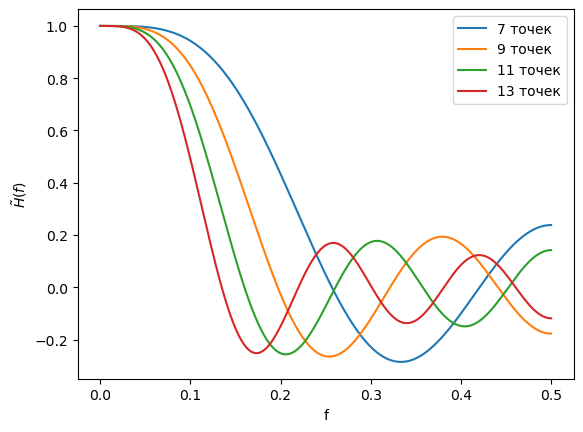

In [30]:
H7_2 = [1 / 21 * (7 + 12 * np.cos(w) + 6 * np.cos(2 * w) - 4 * np.cos(3 * w)) for w in W]
H9_2 = [1 / 231 * (59 + 108 * np.cos(w) + 78 * np.cos(2 * w) + 28 * np.cos(3 * w) - 42 * np.cos(4 * w)) for w in W]
H11_2 = [1 / 429 * (89 + 168 * np.cos(w) + 138 * np.cos(2 * w) + 88 * np.cos(3 * w) + 18 * np.cos(4 * w) - 72 * np.cos(5 * w)) for w in W]
H13_2 = [1 / 143 * (25 + 48 * np.cos(w) + 42 * np.cos(2 * w) + 32 * np.cos(3 * w) + 18 * np.cos(4 * w) - 22 * np.cos(6 * w)) for w in W]

# График передаточной функции при сглаживании полиномом второй степени по 7, 9, 11 и 13 точкам
plt.figure()
plt.plot(F, H7_2, label='7 точек')
plt.plot(F, H9_2, label='9 точек')
plt.plot(F, H11_2, label='11 точек')
plt.plot(F, H13_2, label='13 точек')
plt.xlabel('f')
plt.ylabel('$\\tilde H(f)$')
plt.legend()
plt.show()

В отличие от линейной интерполяции, данный подход дает более крутой спад и более широкую полосу пропускания, но ценой за это являются выраженные высокочастотные пульсации. При этом, как и ранее, увеличение числа точек усиливает подавление высоких частот, но одновременно обостряет проблему искажений на резких перепадах сигнала.

### 3. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом четвёртой степени по 9, 11, 13 и 15 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

В основе метода лежит аппроксимация сигнала на скользящем интервале полиномом 4-й степени:
Выходной сигнал: $y(t) = A + Bt + Ct^2 + Dt^3 + Et^4$

Случай 9 точек (интервал от k=-4 до k=4)
Для нахождения коэффициентов полинома $A$, $B$, $C$, $D$ и $E$ используется метод наименьших квадратов (МНК). Минимизируется следующая функция невязки:

$F(A,B,C,D,E) = \sum_{k=-4}^{4} (s_k - y_k)^2 = \sum_{k=-4}^{4} (s_k - A - Bk - Ck^2 - Dk^3 - Ek^4)^2$

Приравнивая частные производные к нулю, получаем систему нормальных уравнений:

$ \begin{cases}
9A + 60C + 708E = \sum_{k=-4}^{4} s_k \
60B + 708D = \sum_{k=-4}^{4} k s_k \
60A + 708C + 9780E = \sum_{k=-4}^{4} k^2 s_k \
708B + 9780D = \sum_{k=-4}^{4} k^3 s_k \
708A + 9780C + 144708E = \sum_{k=-4}^{4} k^4 s_k
\end{cases} $

Решение этой системы для центральной точки ($t=0$) позволяет выразить сглаженное значение $y_0$ непосредственно через отсчеты входного сигнала:

$y_0 = A = \frac{1}{429} (15s_{-4} - 55s_{-3} + 30s_{-2} + 135s_{-1} + 179s_{0} + 135s_{1} + 30s_{2} - 55s_{3} + 15s_{4})$

В общем виде, для любого отсчета $n$, формула сглаживания принимает вид:

$y_n = \frac{1}{429} (15s_{n-4} - 55s_{n-3} + 30s_{n-2} + 135s_{n-1} + 179s_{n} + 135s_{n+1} + 30s_{n+2} - 55s_{n+3} + 15s_{n+4})$

Частотная характеристика
Чтобы найти частотную характеристику $H(w)$ данного цифрового фильтра, рассмотрим его реакцию на комплексную экспоненту $s_n = e^{i\omega n}$.

Подставив $s_n$ в формулу для $y_n$, получаем:

$y_n = \frac{1}{429} (15e^{i\omega (n-4)} - 55e^{i\omega (n-3)} + 30e^{i\omega (n-2)} + 135e^{i\omega (n-1)} + 179e^{i\omega n} + ... ) = H(w)e^{i\omega n}$

Где частотная характеристика $H(w)$ определяется как:

$H(w) = \frac{1}{429} (179 + 270\cos(\omega) + 60\cos(2\omega) - 110\cos(3\omega) + 30\cos(4\omega))$

Аналогичным образом выводятся характеристики для фильтров с большей апертурой.

Сводка частотных характеристик для разного числа точек
Для 9 точек:
$H(w) = \frac{1}{429} (179 + 270\cos(w) + 60\cos(2w) - 110\cos(3w) + 30\cos(4w))$

Для 11 точек:
$H(w) = \frac{1}{429} (143 + 240\cos(w) + 120\cos(2w) - 20\cos(3w) - 90\cos(4w) + 36\cos(5w))$

Для 13 точек:
$H(w) = \frac{1}{2431} (677 + 1200\cos(w) + 780\cos(2w) + 220\cos(3w) - 270\cos(4w) - 396\cos(5w) + 220\cos(6w))$

Для 15 точек:
$H(w) = \frac{1}{46189} (11063 + 20250\cos(w) + 15000\cos(2w) + 7510\cos(3w) - 330\cos(4w) - 5874\cos(5w) - 5720\cos(6w) + 4290\cos(7w))$

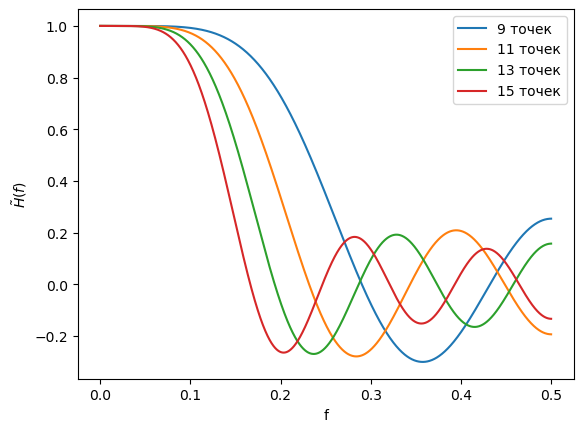

In [36]:
H9_4 = [1 / 429 * (179 + 270 * np.cos(w) + 60 * np.cos(2 * w) - 110 * np.cos(3 * w) + 30 * np.cos(4 * w)) for w in W]
H11_4 = [1 / 429 * (143 + 240 * np.cos(w) + 120 * np.cos(2 * w) - 20 * np.cos(3 * w) - 90 * np.cos(4 * w) + 36 * np.cos(5 * w)) for w in W]
H13_4 = [1 / 2431 * (677 + 1200 * np.cos(w) + 780 * np.cos(2 * w) + 220 * np.cos(3 * w) - 270 * np.cos(4 * w) - 396 * np.cos(5 * w) + 220 * np.cos(6 * w)) for w in W]
H15_4 = [1 / 46189 * (11063 + 20250 * np.cos(w) + 15000 * np.cos(2 * w) + 7510 * np.cos(3 * w) - 330 * np.cos(4 * w) - 5874 * np.cos(5 * w) - 5720 * np.cos(6 * w) + 4290 * np.cos(7 * w)) for w in W]

# График передаточной функции при сглаживании полиномом четвертой степени по 9, 11, 13 и 15 точкам
plt.figure()
plt.plot(F, H9_4, label='9 точек')
plt.plot(F, H11_4, label='11 точек')
plt.plot(F, H13_4, label='13 точек')
plt.plot(F, H15_4, label='15 точек')
plt.xlabel('f')
plt.ylabel('$\\tilde H(f)$')
plt.legend()
plt.show()

Анализ амплитудно-частотной характеристики подтверждает, что фильтр на основе полинома четвертой степени также относится к классу низкочастотных. По сравнению с фильтрами, использующими аппроксимацию прямой линией и полиномом второй степени при равной ширине окна, данный фильтр демонстрирует существенно более широкую полосу пропускания. Это указывает на его меньшую избирательность (селективность) в низкочастотной области.

С увеличением количества точек в окне сглаживания наблюдается сужение главной полосы пропускания, что свидетельствует о повышении избирательности фильтра к низким частотам. Кроме того, на передаточной характеристике наблюдаются выраженные колебания (пульсации) в области подавления, амплитуда которых возрастает с ростом частоты.

### 4. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию по формулам Спенсера по 15 и 21 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.



Приведены формулы для сглаживания данных по методу Спенсера, использующие взвешенное скользящее среднее, и рассчитана их амплитудно-частотная характеристика.

1. Формулы сглаживания
Сглаживание по 15 точкам:
$y_n = \frac{1}{320} (-3s_{n-7} - 6s_{n-6} - 5s_{n-5} + 3s_{n-4} + 21s_{n-3} + 46s_{n-2} + 67s_{n-1} + 74s_{n} + 67s_{n+1} + 46s_{n+2} + 21s_{n+3} + 3s_{n+4} - 5s_{n+5} - 6s_{n+6} - 3s_{n+7})$

Сглаживание по 21 точке:
$y_n = \frac{1}{350} (-1s_{n-10} - 3s_{n-9} - 5s_{n-8} - 5s_{n-7} - 2s_{n-6} + 6s_{n-5} + 18s_{n-4} + 33s_{n-3} + 47s_{n-2} + 57s_{n-1} + 60s_{n} + 57s_{n+1} + 47s_{n+2} + 33s_{n+3} + 18s_{n+4} + 6s_{n+5} - 2s_{n+6} - 5s_{n+7} - 5s_{n+8} - 3s_{n+9} - 1s_{n+10})$

2. Анализ частотной характеристики
Для анализа реакции фильтра на разные частоты рассмотрим входной сигнал в виде комплексной экспоненты: $s_n = e^{i \omega n}$.

Для 15-точечного фильтра выходной сигнал $y_n$ также будет пропорционален $e^{i \omega n}$, что позволяет записать:
$y_n = e^{i \omega n} \cdot H_{15}(\omega)$,
где $H_{15}(\omega)$ — комплексная частотная характеристика фильтра.

После преобразований с использованием формулы Эйлера ($\cos x = \frac{e^{ix} + e^{-ix}}{2}$), эта характеристика приводится к вещественному виду, удобному для анализа. В терминах обычной частоты $f$ ($\omega = 2\pi f$) итоговая передаточная функция имеет вид:

$\tilde{H}_{15}(f) = \frac{1}{320} \left( 74 + 2\left( 67 \cos(2 \pi f) + 46 \cos(4 \pi f) + 21 \cos(6 \pi f) + 3 \cos(8 \pi f) - 5 \cos(10 \pi f) - 6 \cos(12 \pi f) - 3 \cos(14 \pi f) \right) \right)$

Аналогично для 21-точечного фильтра передаточная функция записывается как:

$\tilde{H}_{21}(f) = \frac{1}{350} \left( 60 + 2\left( 57 \cos(2 \pi f) + 47 \cos(4 \pi f) + 33 \cos(6 \pi f) + 18 \cos(8 \pi f) + 6 \cos(10 \pi f) - 2 \cos(12 \pi f) - 5 \cos(14 \pi f) - 5 \cos(16 \pi f) - 3 \cos(18 \pi f) - 1 \cos(20 \pi f) \right) \right)$

Эти функции показывают, как данный фильтр Спенсера ослабляет или пропускает гармонические составляющие входного сигнала в зависимости от их частоты $f$.

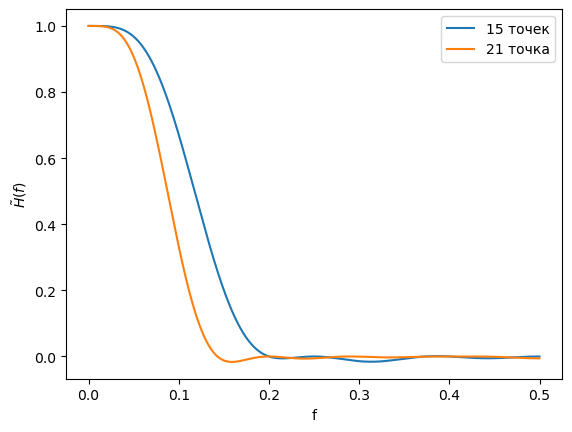

In [46]:
H15 = [1 / 320 * (74 + 134 * np.cos(w) + 92 * np.cos(2 * w) + 42 * np.cos(3 * w) + 6 * np.cos(4 * w) - 10 * np.cos(5 * w) - 12 * np.cos(6 * w) - 6 * np.cos(7 * w)) for w in W]
H21 = [1 / 350 * (60 + 114 * np.cos(w) + 94 * np.cos(2 * w) + 66 * np.cos(3 * w) + 36 * np.cos(4 * w) + 12 * np.cos(5 * w) - 4 * np.cos(6 * w) - 10 * np.cos(7 * w) - 10 * np.cos(8 * w) - 6 * np.cos(9 * w) - 2 * np.cos(10 * w)) for w in W]

# График передаточной функции при сглаживании по формулам Спенсера для 15 и 21 точек
plt.figure()
plt.plot(F, H15, label='15 точек')
plt.plot(F, H21, label='21 точка')
plt.xlabel('f')
plt.ylabel('$\\tilde H(f)$')
plt.legend()
plt.show()

Как и в предыдущих случаях, увеличение количества точек приводит к более резкому срезу частотной характеристики, однако это достигается за счёт сужения полосы пропускания и практически полного подавления высоких частот.

### 5. Построить графики из предыдущих пунктов в логарифмической шкале (Дб). Объясните, чем отличаются данные графики от полученных ранее и объясните их смысл.


$Дб = 20 \lg \left(\left|\frac{y_n}{s_n}\right|\right) = 20 \lg (|H(w)|)$

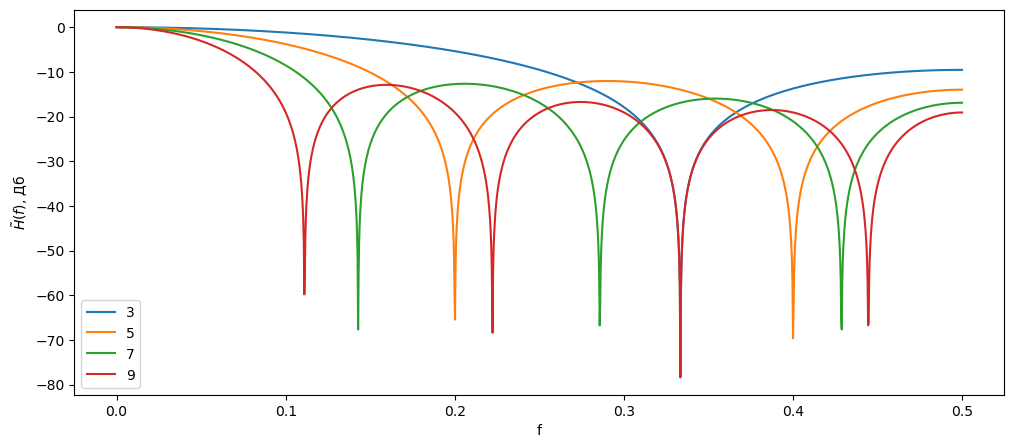

In [71]:
plt.figure(figsize=(12,5))
plt.plot(F, [20 * m.log10(abs(h)) for h in H3_1], label='3')
plt.plot(F, [20 * m.log10(abs(h)) for h in H5_1], label='5')
plt.plot(F, [20 * m.log10(abs(h)) for h in H7_1], label='7')
plt.plot(F, [20 * m.log10(abs(h)) for h in H9_1], label='9')
plt.xlabel('f')
plt.ylabel('$\\tilde H(f)$, Дб')
plt.legend()
plt.show()

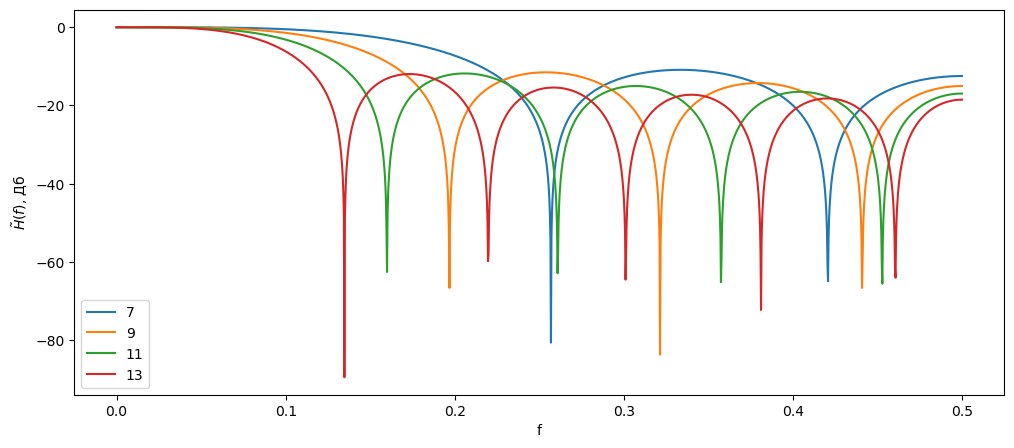

In [69]:
plt.figure(figsize=(12,5))
plt.plot(F, [20 * m.log10(abs(h)) for h in H7_2], label='7')
plt.plot(F, [20 * m.log10(abs(h)) for h in H9_2], label='9')
plt.plot(F, [20 * m.log10(abs(h)) for h in H11_2], label='11')
plt.plot(F, [20 * m.log10(abs(h)) for h in H13_2], label='13')
plt.xlabel('f')
plt.ylabel('$\\tilde H(f)$, Дб')
plt.legend()
plt.show()

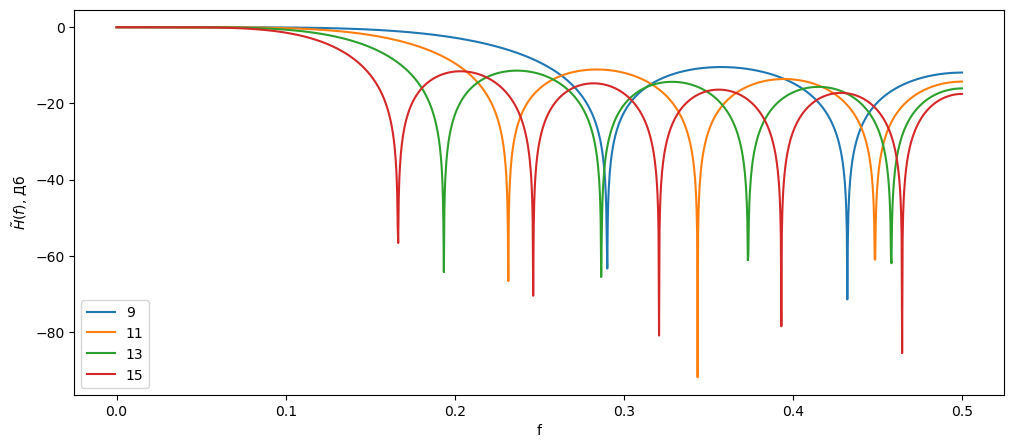

In [67]:
plt.figure(figsize=(12,5))
plt.plot(F, [20 * m.log10(abs(h)) for h in H9_4], label='9')
plt.plot(F, [20 * m.log10(abs(h)) for h in H11_4], label='11')
plt.plot(F, [20 * m.log10(abs(h)) for h in H13_4], label='13')
plt.plot(F, [20 * m.log10(abs(h)) for h in H15_4], label='15')
plt.xlabel('f')
plt.ylabel('$\\tilde H(f)$, Дб')
plt.legend()
plt.show()

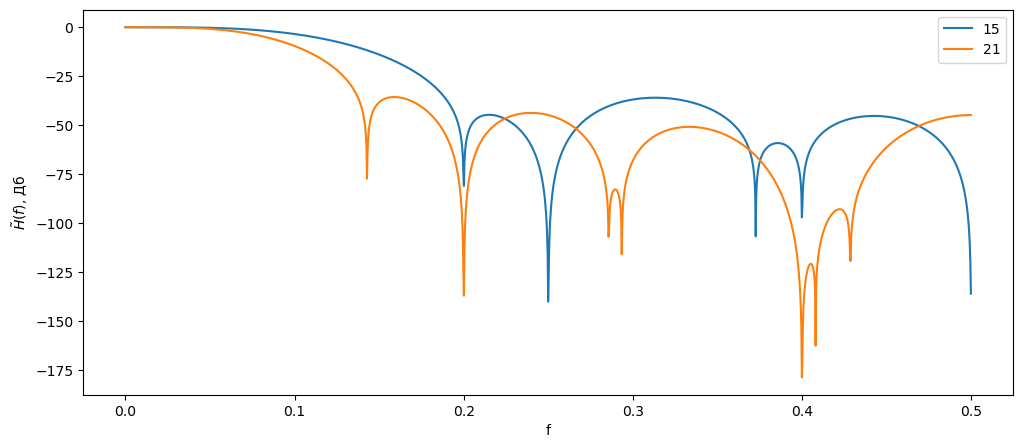

In [63]:
plt.figure(figsize=(12,5))
plt.plot(F, [20 * m.log10(abs(h)) for h in H15], label='15')
plt.plot(F, [20 * m.log10(abs(h)) for h in H21], label='21')
plt.xlabel('f')
plt.ylabel('$\\tilde H(f)$, Дб')
plt.legend()
plt.show()

Линейное представление амплитудной характеристики позволяет наглядно оценить ключевые параметры фильтра, такие как основная полоса пропускания и пульсации амплитуды.

В то же время логарифмический масштаб (в децибелах) лучше подходит для анализа характеристик подавления, поскольку акцентирует внимание на глубине затухания и ширине полосы подавления. Это особенно важно для оценки эффективности фильтрации высокочастотных составляющих сигнала. Как видно из графиков, логарифмическое представление делает очевидной способность фильтра подавлять высокочастотные шумы, что критично при работе с сигналами с низким уровнем шума.

### 6. Провести сопоставительный анализ свойств передаточных функций, полученных при выполнении п. 1–4.


Анализ полученных передаточных функций для фильтров сглаживания (полиномами 1-й, 2-й и 4-й степени, а также по методу Спенсера) показывает, что с увеличением количества точек все они демонстрируют резкий спад амплитуды и эффективное подавление высоких частот. При этом с ростом степени полинома наблюдается расширение полосы пропускания и увеличение частоты пульсаций в полосе подавления. В отличие от полиномиальных методов, сглаживание по Спенсеру характеризуется практически полным отсутствием этих пульсаций на высоких частотах.

### Выводы

В ходе лабораторной работы были получены аналитические выражения и проведён частотный анализ нерекурсивных фильтров, соответствующих сглаживанию полиномами 1-й, 2-й и 4-й степеней, а также по методу Спенсера. Для каждого типа фильтров были рассчитаны и построены графики передаточных функций в линейном и логарифмическом масштабах, что позволило детально исследовать их амплитудно-частотные характеристики, включая анализ пульсаций. По результатам построений выполнен сравнительный анализ фильтров, выявивший их ключевые частотные свойства.